# Q2 ai


Note: 

$\nabla f(x)  = \nabla x^2 = 2x$

$x* = 0$ as that is the global/local min of $x^2$

\begin{align*}
    x_t &= x_{t-1} - 0.1*(2*x_{t-1})\\
    x_0 &= 1\\
    x_1 &= 1 - 0.1*(2*1)= 0.8\\
    x_2 &= 0.8 - 0.1*(2*0.8)= 0.64\\
    x_3 &= 0.64 - 0.1*(2*0.64)= 0.512\\
    \text{ So } | x_3 - x* | &= 0.512 - 0 = 0.512\\
\end{align*}

# Q2 aii


\begin{align*}
    v_t &= 0.5*v_{t-1} + 0.1*2*x_{t-1}\\
    x_t &= x_{t-1} - v_t\\
    v_0 &= 0\\
    x_0 &= 1\\
    v_1 &= 0.5*0 + 0.1*2*1 = 0.2\\
    x_1 &= 1 - 0.2 = 0.8\\
    v_2 &= 0.5*0.2 + 0.1*2*0.8= 0.26\\
    x_2 &= 0.8 - 0.26 = 0.54\\
    v_3 &= 0.5*0.26+ 0.1*2*0.54 = 0.238\\
    x_3 &= 0.54 - 0.238 = 0.302\\
    \text{ So } | x_3 - x* | &= 0.302 - 0 = 0.302\\
\end{align*}

As expected gradient descent with momentum had the lower optimality gap after iteration 3 and thus converged faster. This makes sense as accelerated convergence is one of the main points of using gradient descent with momentum.

# Q2 bi

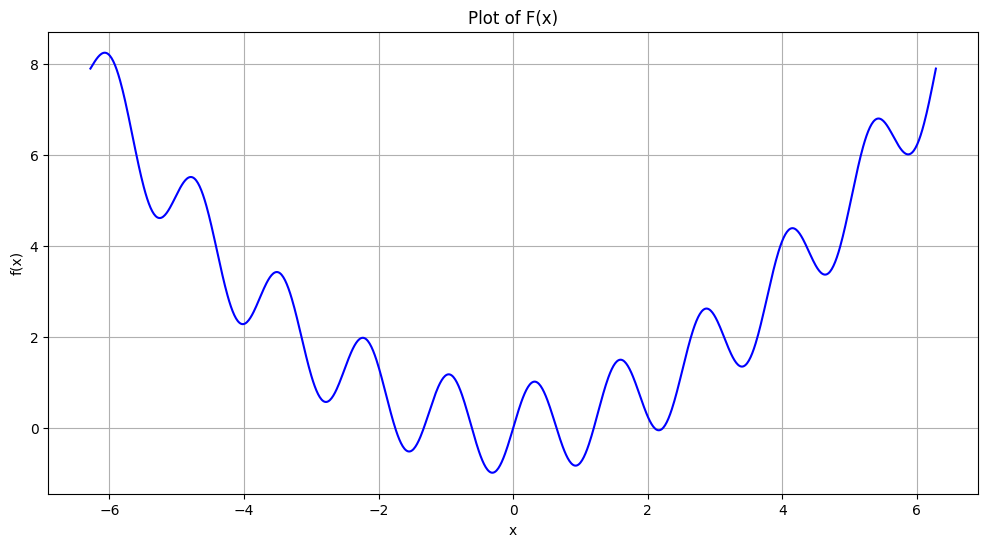

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Define the function and its gradient
def f(x):
    return np.sin(5*x) + (1/5) * x**2
x = np.linspace(-np.pi*8, np.pi*8, 1000)
x = np.linspace(-np.pi*2, np.pi*2, 1000)

plt.figure(figsize=(12, 6))
plt.plot(x, f(x), 'b-', label='f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of F(x)')
plt.grid(True)
plt.show()

This function is challenging for gradient descent to optimize as there are many local minimum that gradient descent can get stuck in (depending on the starting point). 

# Q2 bii

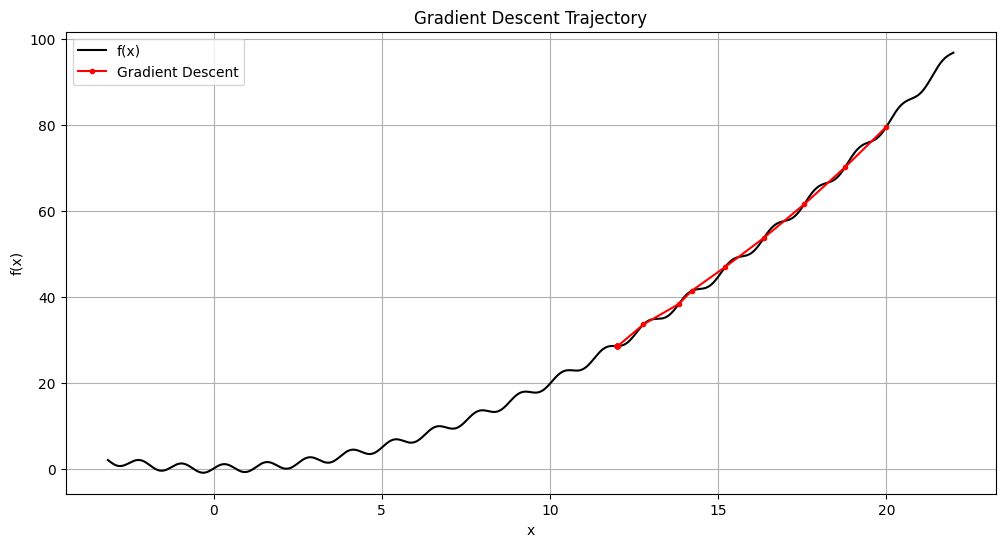

In [2]:
def grad_f(x):
    return 5*np.cos(5*x) + (2/5) * x

# Gradient Descent
def gradient_descent(x0, eta, num_iterations):
    x = x0
    trajectory = [x]
    for _ in range(num_iterations):
        x = x - eta * grad_f(x)
        trajectory.append(x)
    return np.array(trajectory)

x0 = 20
eta = 0.1
num_iterations = 20
gd_trajectory = gradient_descent(x0, eta, num_iterations)

x = np.linspace(-np.pi, np.pi*7, 1000)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(x, f(x), 'k-', label='f(x)')
plt.plot(gd_trajectory, f(gd_trajectory), 'ro-', label='Gradient Descent', markersize=3)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent Trajectory')
plt.legend()
plt.grid(True)
plt.show()

Note at iteration 9 ish Gradient Descent gets stuck at a local minimum 

# Q2 biii

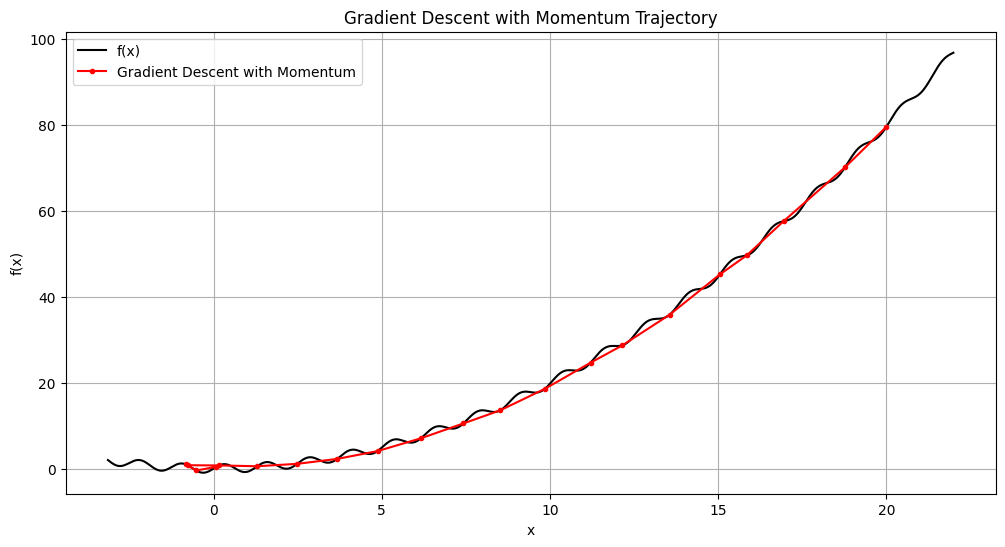

In [3]:
# Gradient Descent with Momentum
def gradient_descent_momentum(x0, eta, beta, num_iterations):
    x = x0
    v = 0 # just set it to 0 as I assumed no starting Momentum
    trajectory = [x]
    for _ in range(num_iterations):
        v = beta * v + eta * grad_f(x)
        x = x - v
        trajectory.append(x)
    return np.array(trajectory)

x0 = 20
eta = 0.1
num_iterations = 20
beta = 0.5
gdm_trajectory = gradient_descent_momentum(x0, eta, beta, num_iterations)
# Plotting
x = np.linspace(-np.pi, np.pi*7, 1000)
plt.figure(figsize=(12, 6))
plt.plot(x, f(x), 'k-', label='f(x)')
plt.plot(gdm_trajectory, f(gdm_trajectory), 'ro-', label='Gradient Descent with Momentum', markersize=3)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent with Momentum Trajectory')
plt.legend()
plt.grid(True)
plt.show()



Given the parameters Gradient Descent with Momentum almost achieves the optimum value (it still needs a few more iterations). In other words, Gradient Descent with Momentum will find the optimum value but Gradient Descent on its own will get stuck and never find it.

# Q2 biv

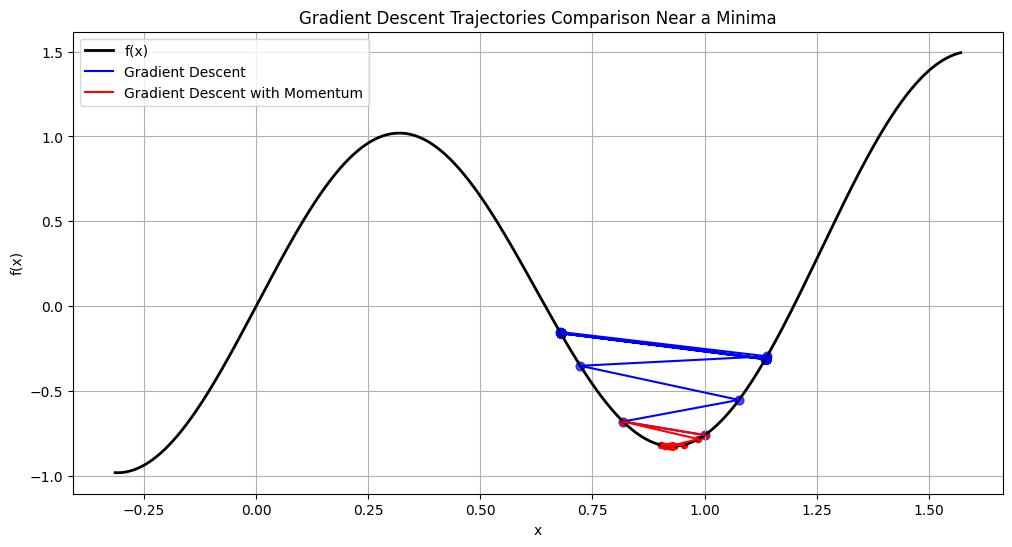

In [4]:
x0 = 1
eta = 0.1
num_iterations = 200
beta = 0.5
gd_trajectory = gradient_descent(x0, eta, num_iterations)
gdm_trajectory = gradient_descent_momentum(x0, eta, beta, num_iterations)

# Plotting
x = np.linspace(-np.pi/10, np.pi/2, 1000)
plt.figure(figsize=(12, 6))
plt.plot(x, f(x), 'k-', label='f(x)', linewidth=2)
# Plot GD trajectory with slightly larger, semi-transparent markers
plt.plot(gd_trajectory, f(gd_trajectory), 'b-', label='Gradient Descent', linewidth=1.5)
plt.scatter(gd_trajectory, f(gd_trajectory), color='blue', s=40, alpha = 0.7)
# Plot GDM trajectory with slightly smaller, fully opaque markers
plt.plot(gdm_trajectory, f(gdm_trajectory), 'r-', label='Gradient Descent with Momentum', linewidth=1.5)
plt.scatter(gdm_trajectory, f(gdm_trajectory), color='red', s=20, alpha=1)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent Trajectories Comparison Near a Minima')
plt.legend()
plt.grid(True)
plt.show()


As you can see above Gradient Descent with Momentum quickly adjust its step size and found the local minima rather quickly. Gradient Descent on the other hand jumped around from side to side slowly going down until it got stuck jumping between two points. 

It should also be noted that neither one was able to find the global minimum. Gradient Descent with Momentum did better starting further from the Global Minima.

# 2ci.

The second-order Taylor series expansion of L(w) around w0 is given by:

$$\bar{L}(w) = L(w_0) + \nabla L(w_0)(w - w_0) + \frac{1}{2}(w - w_0)^T H L(w_0)(w - w_0)$$
Where:
- L(w0) is the value of the function at the starting point w0
- ∇L(w0) is the gradient of L at w0
- HL(w0) is the Hessian matrix of L at w0

Note: used this source to see what the second-order Taylor series expansion is. https://mathinsight.org/taylors_theorem_multivariable_introduction


# 2cii.

   $$\bar{L}(w) = L(w_0) + \nabla L(w_0)(w - w_0) + \frac{1}{2}(w - w_0)^T H L(w_0)(w - w_0)$$
To minimize $\bar{L}(w)$ we take its derivative and set it equal to 0.

   $$\bar{L}(w) = L(w_0) -w_0\nabla L(w_0) + w\nabla L(w_0) + \frac{1}{2}(w - w_0)^T H L(w_0)(w - w_0)$$

   Note here first to terms go to 0 when taking the derivate then the other two are shown in order

   $$\frac{\partial \bar{L}(w)}{\partial w} = \nabla L(w_0) + H L(w_0)(w - w_0) = 0$$

Solve for w:

   $$H L(w_0)(w - w_0) = -\nabla L(w_0)$$
   $$(w - w_0) = -[H L(w_0)]^{-1}\nabla L(w_0)$$

Therefore, the value of w that minimizes $\bar{L}(w)$ is:

   $$w_1 = w_0 - [H L(w_0)]^{-1}\nabla L(w_0)$$

# 2ciii.

$$L(w) = \frac{1}{2} w^T A w - b^T w$$


Given
$$L(w) = \frac{1}{2} w^T A w - b^T w$$

The gradient of L(w) is:
$$\nabla L(w) = Aw - b$$

The Hessian matrix is (as this a quadratic): 
$$\nabla \nabla L(w) = HL(w) =  A $$

Now we can plug w1: 
   $$w_1 = w_0 - [H L(w_0)]^{-1}\nabla L(w_0)$$
   $$w_1 = w_0 - A^{-1} (Aw_0-b)$$
   $$w_1 = w_0 - A^{-1}Aw_0-A^{-1}b$$
   $$w_1 = w_0 - w_0-A^{-1}b$$
   $$w_1 = A^{-1}b$$


Note: For a quadratic function like L(w), the second-order Taylor expansion is exact (not an approximation).

Now by setting the gradient to zero we see that the second-order method finds the exact minimizer in a single step, regardless of the starting point w0:
   $$\nabla L(w) = Aw - b = 0$$
   $$Aw = b$$
   $$w = A^{-1}b$$

# 2civ.

In real-world scenarios with high-dimensional parameter spaces the second-order optimization method has two main bottlenecks

### The main memory bottleneck is the storage of the Hessian matrix

**Hessian Matrix Size**: For a model with n parameters, the Hessian matrix H is an n × n matrix. In a neural network with millions of parameters, this matrix becomes extremely large.

### The main computational bottleneck is the inversion of the Hessian matrix:

 The time complexity of inverting an n × n matrix where n > million is really slow(assuming it is even invertible).

